In [3]:
from sklearn.metrics import log_loss

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import cv2
plt.style.use('ggplot')
from IPython.display import Video, HTML

## TOC:
* [Input](#Input)
* [Output](#Output)

## Input

In [5]:
!ls -GFlash ../input/deepfake-detection-challenge

total 56K
4,0K drwxr-xr-x 4 laplace 4,0K feb  3 10:09 ./
4,0K drwxr-xr-x 3 laplace 4,0K feb  3 10:07 ../
8,0K -rw-rw-r-- 1 laplace 6,7K dic 10 03:21 sample_submission.csv
 20K drwxr-xr-x 2 laplace  20K feb  3 10:08 test_videos/
 20K drwxr-xr-x 2 laplace  20K feb  3 10:09 train_sample_videos/


In [21]:
train_dir = '../input/deepfake-detection-challenge/train_sample_videos/'
test_dir = '../input/deepfake-detection-challenge/test_videos/'

In [36]:
train_sample_metadata = pd.read_json(train_dir + 'metadata.json').T
train_sample_metadata.head()

,label,split,original
aagfhgtpmv.mp4,FAKE,train,vudstovrck.mp4
aapnvogymq.mp4,FAKE,train,jdubbvfswz.mp4
abarnvbtwb.mp4,REAL,train,None
abofeumbvv.mp4,FAKE,train,atvmxvwyns.mp4
abqwwspghj.mp4,FAKE,train,qzimuostzz.mp4


In [ ]:
train_sample_metadata.loc[]

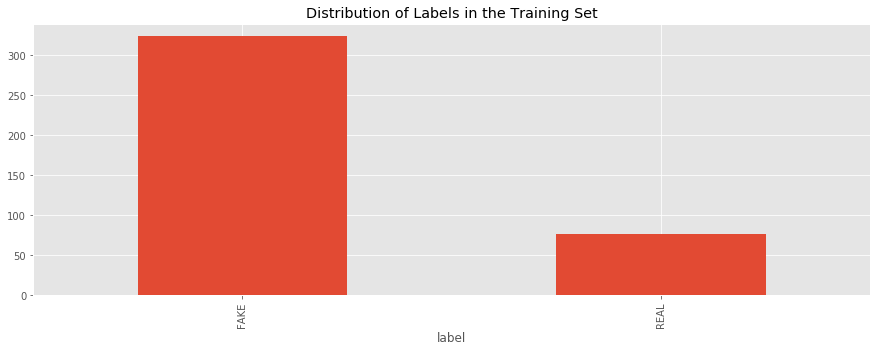

In [13]:
train_sample_metadata.groupby('label')['label'].count().plot(figsize=(15, 5), kind='bar', title='Distribution of Labels in the Training Set')
plt.show()

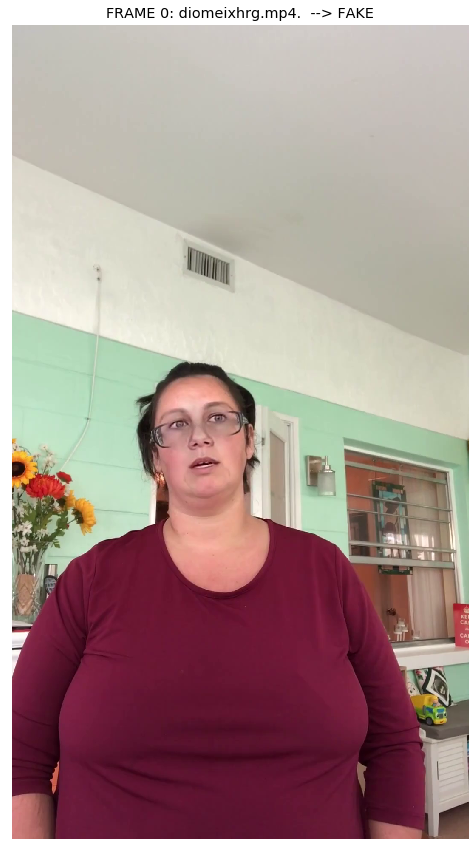

In [41]:
import cv2 as cv
import os
import matplotlib.pylab as plt
fig, ax = plt.subplots(1,1, figsize=(15, 15))
train_video_files = [train_dir + x for x in os.listdir(train_dir)]
video_file = train_video_files[np.random.randint(0, len(train_video_files))]
# video_file = train_dir + 'akxoopqjqz.mp4'
cap = cv.VideoCapture(video_file)
success, image = cap.read()
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
cap.release()   
ax.imshow(image)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
name_video = video_file.split('/')[-1]
ax.title.set_text(f"FRAME 0: {name_video}.  --> {train_sample_metadata.loc[name_video, 'label']}")
plt.grid(False)

I found 1 face(s) in this photograph.
A face is located at pixel location Top: 885, Left: 340, Bottom: 1108, Right: 563


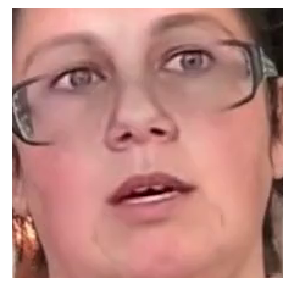

In [44]:
import face_recognition
face_locations = face_recognition.face_locations(image)

# https://github.com/ageitgey/face_recognition/blob/master/examples/find_faces_in_picture.py
from PIL import Image

print("I found {} face(s) in this photograph.".format(len(face_locations)))

for face_location in face_locations:

    # Print the location of each face in this image
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    # You can access the actual face itself like this:
    face_image = image[top:bottom, left:right]
    fig, ax = plt.subplots(1,1, figsize=(5, 5))
    plt.grid(False)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.imshow(face_image)

In [ ]:
def crop_face(image):
    ''''''

In [51]:
image.shape

(1920, 1080, 3)

In [52]:
face_image.shape

(223, 223, 3)

### Locating face landmarks within an image

In [45]:
face_landmarks_list = face_recognition.face_landmarks(image)

The chin in this face has the following points: [(339, 996), (345, 1019), (351, 1041), (359, 1062), (370, 1080), (385, 1094), (407, 1104), (432, 1110), (460, 1112), (487, 1105), (511, 1095), (531, 1081), (544, 1062), (550, 1040), (553, 1014), (553, 988), (551, 961)]
The left_eyebrow in this face has the following points: [(353, 938), (361, 921), (377, 910), (397, 907), (415, 912)]
The right_eyebrow in this face has the following points: [(451, 904), (468, 893), (490, 891), (510, 898), (524, 915)]
The nose_bridge in this face has the following points: [(436, 932), (438, 945), (440, 957), (442, 970)]
The nose_tip in this face has the following points: [(428, 999), (438, 1000), (447, 999), (456, 996), (465, 993)]
The left_eye in this face has the following points: [(377, 950), (387, 940), (401, 936), (415, 945), (403, 949), (388, 953)]
The right_eye in this face has the following points: [(464, 937), (476, 925), (490, 923), (503, 932), (492, 937), (477, 938)]
The top_lip in this face has 

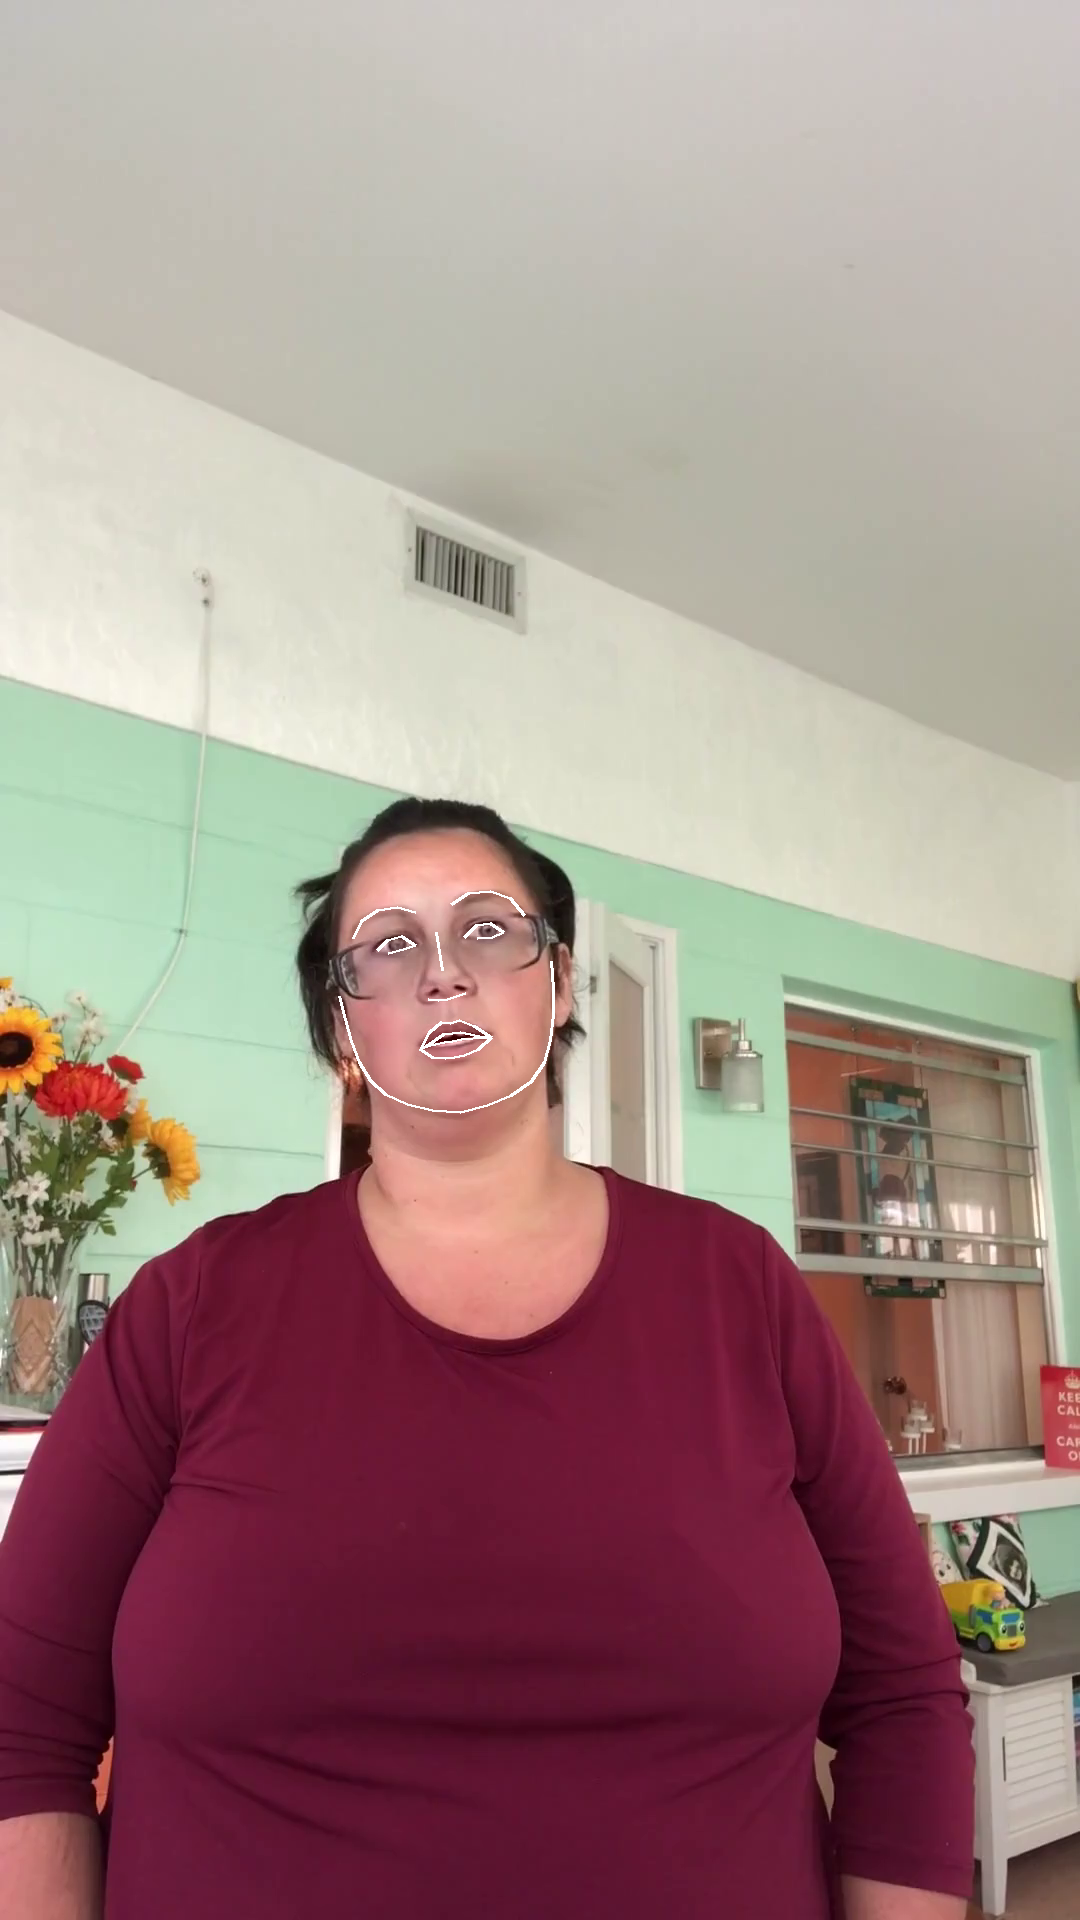

In [46]:
# https://github.com/ageitgey/face_recognition/blob/master/examples/find_facial_features_in_picture.py
# face_landmarks_list
from PIL import Image, ImageDraw
pil_image = Image.fromarray(image)
d = ImageDraw.Draw(pil_image)

for face_landmarks in face_landmarks_list:

    # Print the location of each facial feature in this image
    for facial_feature in face_landmarks.keys():
        print("The {} in this face has the following points: {}".format(facial_feature, face_landmarks[facial_feature]))

    # Let's trace out each facial feature in the image with a line!
    for facial_feature in face_landmarks.keys():
        d.line(face_landmarks[facial_feature], width=3)

# Show the picture
display(pil_image)

## Output

In [19]:
ss = pd.read_csv("../input/deepfake-detection-challenge/sample_submission.csv")
ss['label'] = np.random.uniform(.4, .6, size=len(ss['label']))
ss.to_csv('submission.csv', index=False)

In [21]:
ss.head()

,filename,label
0,aassnaulhq.mp4,0.444951
1,aayfryxljh.mp4,0.436887
2,acazlolrpz.mp4,0.404106
3,adohdulfwb.mp4,0.403095
4,ahjnxtiamx.mp4,0.518649
